In [7]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
import kmeans
sys.path.append('../')
from functions import *
from trace_analysis import *
from plots import *
from trace_analysis_cooja2 import *
from node import *
from pandas.plotting import scatter_matrix
import cmath as math
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
# scipy
from scipy.cluster.vq import kmeans,vq,whiten
import sklearn.metrics as sm
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
import random
random.seed(6666)

In [187]:
directory="../cooja2-9nodes/"
plots = [(directory+"traces/normal", 'grid9_normal_2019-02-11_17:51:17_'),
         (directory+"traces/normal", 'grid9_normal_2019-02-11_20:22:01_'),
         (directory+"traces/1bh-6", 'grid9_1bh-6_2019-02-11_20:48:08_'),
         (directory+"traces/1bh-6", 'grid9_1bh-6_2019-02-11_21:03:19_'),
         (directory+"traces/1bh-3", 'grid9_1bh-3_2019-02-12_14:47:14_')
        ]

print(directory)
cases=[
    "grid9_normal_2019-02-11_17:51:17_",
    'grid9_normal_2019-02-11_20:22:01_',
    'grid9_1bh-6_2019-02-11_20:48:08_',
    'grid9_1bh-6_2019-02-11_21:03:19_',
    'grid9_1bh-3_2019-02-12_14:47:14_'
]
casesAccuracy=[
    "normal",
    "normal",
    "BH",
    "BH",
    "BH"
]

data=import_Cooja2(plots)

../cooja2-9nodes/


In [156]:

def ReplaceMissingPackets(node):
    #print(node.pkts["pkt"])
    print("Executed")
    maxP=-1

    for el in node.pkts["seq"]:
        if(el>maxP): maxP=int(el)
    #print(maxP)
    pkt=[None]*(maxP+1)
    for i in range(len(node.pkts["seq"])):
        index=int(node.pkts["seq"][i])
        #print(index)
        pkt[index]=node.pkts["rtt"][i]
        #pkt[)]=node.pkts["pkt"][i]
    return pkt


        #if(el)
    
#pprint(getPercentageMissingPackets(data[0][3].pkts,100))
#pprint(findMissingPackets(data[0][3]))


In [188]:
pings=getPings(data)
#All data collection is in variable node that is a list of list of nodes
#3 nets input x 9 nodes by net

d={ "label":[],
   "type":[],
    "count":[],
    "std":  [],
    "mean": [],
    "var":  [],
    #"25%":  [],
    #"50%":[],
    #"75%":[],
   #"min":[],
   #"max":[],
   "hop":[],
   #"missing":[],
   "packet loss":[],
   "outliers":[],
   "node":[]
}
#count=[]
labels=[]
var=[]
#window=100
#stats=pd.DataFrame(columns=columns)
rows=[count,labels]
for i in range(len(data)):
    window=pings[i]
    
    for j in range(len(data[i])):
            #df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)
            node=data[i][j].pkts
            name=str(j)+" "+cases[i]
            nodeWindow=node["rtt"]
            #current=data[i][j].pkts['rtt'][z:z+window]
            #print(nodeWindow.shape)
            d["count"].append(nodeWindow.count())
            #Case without outliers
            #d["std"].append(getStdValues(data[i][j].pkts)["rtt"].std())
            
            #Case with outliers
            d["std"].append(nodeWindow.std())
            
            d["mean"].append(nodeWindow.mean())
            d["var"].append(nodeWindow.var())
            d["label"].append(cases[i])
            #d["25%"].append(nodeWindow.describe()["25%"])
            #d["50%"].append(nodeWindow.describe()["50%"])
            #d["75%"].append(nodeWindow.describe()["75%"])
            #d["min"].append(nodeWindow.describe()["min"])
            #d["max"].append(nodeWindow.describe()["max"])
            d["hop"].append(data[i][j].hop)
            d["type"].append(casesAccuracy[i])
            d["outliers"].append(getOutliers(node)["rtt"].count())
            missing=window-nodeWindow.count()
            d["node"].append(data[i][j].ip)
            d["packet loss"].append(getPercentageMissingPackets(node,window))
            
            
            
stats=pd.DataFrame(d)            

stats
correction=[]
correction_alt=[] #for 3 cluster 0:normal net 1:bh net 2:bh

#Creating simple array to correct unsupervised learning
#NB as it is unsupervised could happen that the correction are inverted
for i in range(len(d["type"])):
    el=d["type"][i]
    if el=="normal":
        correction.append(1)
        correction_alt.append(0)
        
    else:
        #print(el=="BH2" and i==BlackHole[2])
        correction.append(0)
        correction_alt.append(1)
                        
        
        

#correction=np.array(correction)
#correction_alt=np.array(correction_alt)

stats

,label,type,count,std,mean,var,hop,packet loss,outliers,node
0,grid9_normal_2019-02-11_17:51:17_,normal,89,180.077789,224.887640,32428.009959,3,10.101010,5,fd00::212:7409:9:909:
1,grid9_normal_2019-02-11_17:51:17_,normal,87,177.151305,163.327586,31382.584812,2,12.121212,5,fd00::212:7404:4:404:
2,grid9_normal_2019-02-11_17:51:17_,normal,92,73.697111,60.042391,5431.264227,1,7.070707,2,fd00::212:7403:3:303:
3,grid9_normal_2019-02-11_17:51:17_,normal,98,70.194851,169.887755,4927.317168,3,1.010101,5,fd00::212:7405:5:505:
4,grid9_normal_2019-02-11_17:51:17_,normal,94,175.025476,254.223404,30633.917296,4,5.050505,3,fd00::212:740a:a:a0a:
5,grid9_normal_2019-02-11_17:51:17_,normal,96,131.656884,173.458333,17333.535088,3,3.030303,3,fd00::212:7407:7:707:
6,grid9_normal_2019-02-11_17:51:17_,normal,99,182.626373,145.127273,33352.392004,2,0.000000,2,fd00::212:7402:2:202:
7,grid9_normal_2019-02-11_17:51:17_,normal,90,84.920837,233.155556,7211.548564,4,9.090909,2,fd00::212:7408:8:808:
8,grid9_normal_2019-02-11_17:51:17_,normal,99,114.012144,154.676768,12998.768945,2,0.000000,6,fd00::212:7406:6:606:
9,grid9_normal_2019-02-11_20:22:01_,normal,86,227.064949,363.290698,51558.490971,3,10.416667,2,fd00::212:7409:9:909:


In [189]:
data=stats.drop([
    "label","mean","var","packet loss","count","node","type"],axis=1)

dataC=stats["label"]

#Y = data[['var']]
#X = data[['std']]

In [161]:
data.head()

,std,hop,outliers
0,180.077789,3,5
1,177.151305,2,5
2,73.697111,1,2
3,70.194851,3,5
4,175.025476,4,3


In [192]:
def accuracy_score_corrected(correction,labels):
    print(np.array(correction))
    labels_alt=[]
    for el in labels:
        if (el==0):
            labels_alt.append(1)
        elif el==1:
            labels_alt.append(0)
    
    accuracy=sm.accuracy_score(correction, labels)
    accuracy_alt=sm.accuracy_score(correction, labels_alt)
    #print(correction)
    if (accuracy>accuracy_alt): 
        print(accuracy)
        
    else: 
        print(accuracy_alt)
        labels=labels_alt
    print(np.array(labels))
    confusionMatrix=sm.confusion_matrix(correction, labels)
    
    pprint(confusionMatrix)
    return labels
    
    

In [195]:

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_

#print(labels)
#print(labels)
#print(correction)

# Performance Metrics
#print(accuracy=sm.accuracy_score(correction, labels)

# Confusion Matrix
#confusionMatrix=sm.confusion_matrix(correction, labels)
#print(accuracy)
#print(confusionMatrix)

labels=accuracy_score_corrected(correction,labels)
predicted=[]
for i in range(len(labels)):
    
    if(i==1):
        predicted.append("normal")
    else: predicted.append("BH")

#print(len(predicted))
stats["predicted"]=pd.Series(np.array(predicted))
stats=stats[[
    "label",
    "type",
    "predicted",
    "packet loss",
    "outliers",
    "std",
    "hop",
    "node"
      
      
      ]]
stats.to_csv("results_kmeans.csv", sep='\t', encoding='utf-8')
stats

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
0.6222222222222222
[1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 0 1 1 1 1 1 1]
array([[15, 12],
       [ 5, 13]])


,label,type,predicted,packet loss,outliers,std,hop,node
0,grid9_normal_2019-02-11_17:51:17_,normal,BH,10.101010,5,180.077789,3,fd00::212:7409:9:909:
1,grid9_normal_2019-02-11_17:51:17_,normal,normal,12.121212,5,177.151305,2,fd00::212:7404:4:404:
2,grid9_normal_2019-02-11_17:51:17_,normal,BH,7.070707,2,73.697111,1,fd00::212:7403:3:303:
3,grid9_normal_2019-02-11_17:51:17_,normal,BH,1.010101,5,70.194851,3,fd00::212:7405:5:505:
4,grid9_normal_2019-02-11_17:51:17_,normal,BH,5.050505,3,175.025476,4,fd00::212:740a:a:a0a:
5,grid9_normal_2019-02-11_17:51:17_,normal,BH,3.030303,3,131.656884,3,fd00::212:7407:7:707:
6,grid9_normal_2019-02-11_17:51:17_,normal,BH,0.000000,2,182.626373,2,fd00::212:7402:2:202:
7,grid9_normal_2019-02-11_17:51:17_,normal,BH,9.090909,2,84.920837,4,fd00::212:7408:8:808:
8,grid9_normal_2019-02-11_17:51:17_,normal,BH,0.000000,6,114.012144,2,fd00::212:7406:6:606:
9,grid9_normal_2019-02-11_20:22:01_,normal,BH,10.416667,2,227.064949,3,fd00::212:7409:9:909:


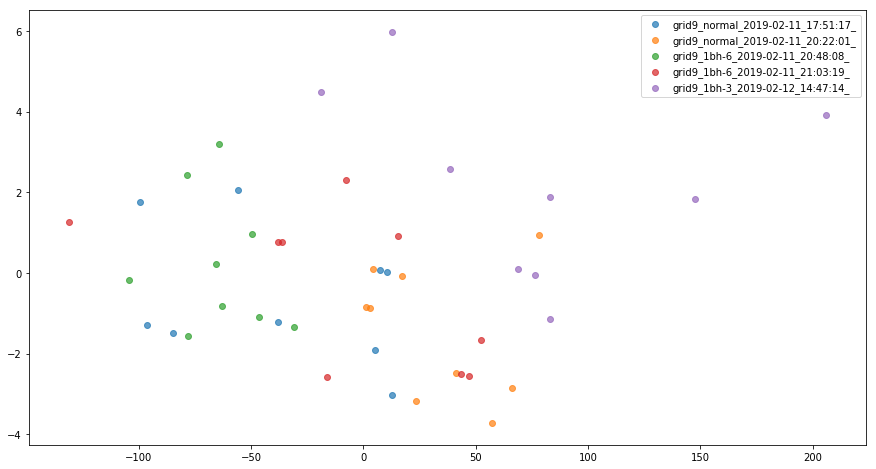

In [196]:
X = data.iloc[:,0:4]
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
dfPCA['labels'] = stats['label']
dfPCA.head()

labels = stats['label'].unique().tolist()
plt.figure(figsize=(15,8))
for lab in labels:
    plt.scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab, alpha=0.7)
    plt.legend()